# Lending Club Case Study

### <font color=blue> Problem Statement:

Lending Club is an online based consumer finance company which specialises in lending various types of loans to urban customers.
We have a dataset containing the information about past loan applicants and whether they ‘defaulted’ or not.The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

There are two types of `risks` associated with the bank’s decision:

1. If the applicant is _**likely to repay the loan**_ , then NOT approving the loan results in a _**loss of business**_ to the company
2. If the applicant is _**not likely to repay the loan**_ , i.e. he/she is likely to _**default**_ , then approving the loan may lead to a _**financial loss**_ for the company

As a result,the company wants —


- To identify the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  

- To utilise this knowledge for its portfolio and risk assessment. 

- To identify risky loan applicants, so that such loans can be reduced thereby cutting down the amount of credit loss.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
#First I will import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
# Supress Warnings
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
#I am setting the necessary options to display the required data in the dataframe and the plots

#pd.options.display.max_info_rows = 115 
#pd.options.display.max_info_columns = 115
#pd.set_option("precision", 4)
pd.options.display.float_format = "{:.2f}".format
sns.set(style="whitegrid")
plt.style.use('ggplot')
#plt.rcParams['figure.figsize'] = (12, 8)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 400)

In [3]:
## Read the given CSV file - 'loan.csv' and view some sample records
loan = pd.read_csv('loan.csv',sep=',',low_memory=False)
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment grade sub_grade                 emp_title emp_length home_ownership  annual_inc verification_status issue_d  loan_status pymnt_plan                                                url                                               desc         purpose                 title zip_code addr_state   dti  \
0  1077501    1296599       5000         5000          4975.00   36 months   10.65%       162.87     B        B2                       NaN  10+ years           RENT    24000.00            Verified  Dec-11   Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...    Borrower added on 12/22/11 > I need to upgra...     credit_card              Computer    860xx         AZ 27.65   
1  1077430    1314167       2500         2500          2500.00   60 months   15.27%        59.83     C        C4                     Ryder   < 1 year           RENT    30000.00     Source Verified  Dec-11  Charged Off          n  https://lendingclub.com/browse/loanDetail.acti...    Borrower added on 12/22/11 > I plan to use t...             car                  bike    309xx         GA  1.00   
2  1077175    1313524       2400         2400          2400.00   36 months   15.96%        84.33     C        C5                       NaN  10+ years           RENT    12252.00        Not Verified  Dec-11   Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...                                                NaN  small_business  real estate business    606xx         IL  8.72   
3  1076863    1277178      10000        10000         10000.00   36 months   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years           RENT    49200.00     Source Verified  Dec-11   Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...    Borrower added on 12/21/11 > to pay for prop...           other              personel    917xx         CA 20.00   
4  1075358    1311748       3000         3000          3000.00   60 months   12.69%        67.79     B        B5  University Medical Group     1 year           RENT    80000.00     Source Verified  Dec-11      Current          n  https://lendingclub.com/browse/loanDetail.acti...    Borrower added on 12/21/11 > I plan on combi...           other              Personal    972xx         OR 17.94   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0            0           Jan-85               1                     NaN                     NaN         3        0      13648     83.70%          9                   f       0.00           0.00      5863.16          5833.84          5000.00         863.16                0.00        0.00                     0.00       Jan-15           171.62          NaN             May-16   
1            0           Apr-99               5                     NaN                     NaN         3        0       1687      9.40%          4                   f       0.00           0.00      1008.71          1008.71           456.46         435.17                0.00      117.08                     1.11       Apr-13           119.66          NaN             Sep-13   
2            0           Nov-01               2                     NaN                     NaN         2        0       2956     98.50%         10                   f       0.00           0.00      3005.67          3005.67          2400.00         605.67                0.00        0.00                     0.00       Jun-14           649.91          NaN             May-16   
3            0           Feb-96               1                   35.00                     NaN        10  

In [4]:
#There are 39717 rows and 111 columns
loan.shape

(39717, 111)

In [5]:
#Using the .info() function to check the number of Null/NaN values in each column
loan.info(verbose=True,show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [6]:
#Using describe() function to get statistical summary of numerical columns
loan.describe()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  installment  annual_inc      dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal  total_acc  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_amnt  \
count   39717.00   39717.00   39717.00     39717.00         39717.00     39717.00    39717.00 39717.00     39717.00        39717.00                14035.00                 2786.00  39717.00 39717.00   39717.00   39717.00   39717.00       39717.00     39717.00         39717.00         39717.00       39717.00            39717.00    39717.00                 39717.00         39717.00   
mean   683131.91  850463.56   11219.44     10947.71         10397.45       324.56    68968.93    13.32         0.15            0.87                   35.90                   69.70      9.29     0.06   13382.53      22.09      51.23          50.99     12153.60         11567.15          9793.35        2263.66                1.36       95.22                    12.41          2678.83   
std    210694.13  265678.31    7456.67      7187.24          7128.45       208.87    63793.77     6.68         0.49            1.07                   22.02                   43.82      4.40     0.24   15885.02      11.40     375.17         373.82      9042.04          8942.67          7065.52        2608.11                7.29      688.74                   148.67          4447.14   
min     54734.00   70699.00     500.00       500.00             0.00        15.69     4000.00     0.00         0.00            0.00                    0.00                    0.00      2.00     0.00       0.00       2.00       0.00           0.00         0.00             0.00             0.00           0.00                0.00        0.00                     0.00             0.00   
25%    516221.00  666780.00    5500.00      5400.00          5000.00       167.02    40404.00     8.17         0.00            0.00                   18.00                   22.00      6.00     0.00    3703.00      13.00       0.00           0.00      5576.93          5112.31          4600.00         662.18                0.00        0.00                     0.00           218.68   
50%    665665.00  850812.00   10000.00      9600.00          8975.00       280.22    59000.00    13.40         0.00            1.00                   34.00                   90.00      9.00     0.00    8850.00      20.00       0.00           0.00      9899.64          9287.15          8000.00        1348.91                0.00        0.00                     0.00           546.14   
75%    837755.00 1047339.00   15000.00     15000.00         14400.00       430.78    82300.00    18.60         0.00            1.00                   52.00                  104.00     12.00     0.00   17058.00      29.00       0.00           0.00     16534.43         15798.81         13653.26        2833.40                0.00        0.00                     0.00          3293.16   
max   1077501.00 1314167.00   35000.00     35000.00         35000.00      1305.19  6000000.00    29.99        11.00            8.00                  120.00                  129.00     44.00     4.00  149588.00      90.00    6311.47        6307.37     58563.68         58563.68         35000.02       23563.68              180.20    29623.35                  7002.19         36115.20   

       collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  annual_inc_joint  dti_joint  verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  total_cu_tl  inq_last_12m  acc_open_past_24mths  \
count                    39661.00                         0.00     39717.00              0.00       0.00                       0.00        39717

## Step 2: Data Cleaning & Manipulation

Following the approach suggested during EDA coursework,the steps are as below -

### 2.1 Fixing Columns

`Unnecessary columns -`
>i.It is evident from below there are 54 columns with absolutely 'NaN' or NULL values.We can drop these columns as it will not add any value to the analysis.<br>

In [7]:
#Using isnull().all() function to check the count of columns having all NULL/NaN values

loan.isnull().all().sum()

54

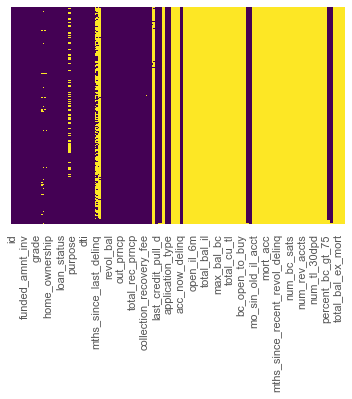

In [8]:
#The heatmap created using seaborn shows the columns in ***'Yellow'*** has entirely 'NaN' values.

sns.heatmap(loan.isnull(),yticklabels = False,cbar=False,cmap='viridis')
plt.show()

In [9]:
#Dropping all the 54 columns with complete 'NaN' values
loan.dropna(axis=1,how='all',inplace=True)

#Shape after dropping all the columns having all the NaN
loan.shape 

(39717, 57)

>ii.The below columns are related to customer behaviour or demographic data and doesn't add any value to the overall analysis of the data.I am grouping them as **redundant** and storing the values in a list with same name.I am going to use the list to drop the columns.<br>
        -  collection_recovery_fee<br>
        -  emp_title<br>
        -  inq_last_6mths<br>
        -  last_credit_pull_d<br>
        -  last_pymnt_amnt<br>
        -  last_pymnt_d<br>
        -  recoveries<br>
        -  title<br>
        -  total_pymnt<br>
        -  total_pymnt_inv<br>
        -  total_rec_int<br>
        -  total_rec_late_fee<br>
        -  total_rec_prncp <br>
        -  out_prncp<br>
        -  out_prncp_inv<br>
        -  acc_now_delinq<br>
        -  revol_util<br>

In [10]:
# Drop additional columns which doesn't add any value to the overall analysis.

redundant = ['collection_recovery_fee','emp_title','last_credit_pull_d',
                'last_pymnt_amnt','last_pymnt_d', 'recoveries','revol_bal','title','total_pymnt','total_pymnt_inv',
                'total_rec_int','total_rec_late_fee','total_rec_prncp','out_prncp', 'out_prncp_inv', 
                 'acc_now_delinq', 'revol_util', 'delinq_2yrs', 'open_acc', 'total_acc']

loan.drop(redundant,axis= 1,inplace=True)

In [11]:
#Shape after dropping above columns
loan.shape 

(39717, 37)

In [12]:
#Checking the % of NULL/NaN values in the remaining columns and sorting the values columns in descending order

round(100*(loan.isnull().sum()/len(loan.index)).sort_values(ascending=False).head(), 2)

next_pymnt_d             97.13
mths_since_last_record   92.99
mths_since_last_delinq   64.66
desc                     32.58
emp_length                2.71
dtype: float64

### Continuing with columns
>iii. `id` and `member_id` — These are system generated sequential numbers which is not useful for the analysis.<br> 
>iv. `chargeoff_within_12_mths, collections_12_mths_ex_med,tax_liens,policy_code,delinq_amnt,pymnt_plan,`— either have ***0*** or ***NA*** as values.<br>
>v. `url` - Adds no significance to the analysis<br>
>vi. `desc` - This is a text field with comments entered by borrower - no use for us <br>
>vii. `next_pymnt_d','mths_since_last_record','mths_since_last_delinq` columns have mostly **NULL** values,so we are can drop them.<br>
>viii. `sub_grade` this has same information as grade column.<br>

`No Unique Identifier`   
>i.`application_type` - All rows have single value `INDIVIDUAL` only - this can be dropped.<br>
>ii.`initial_list_status` - All rows have `f` values!! - this can be dropped. <br>

In [13]:
#Dropping the second set of columns - rational given above. 

second_set = ['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','id','member_id','sub_grade','application_type','chargeoff_within_12_mths','collections_12_mths_ex_med',
                  'delinq_amnt','initial_list_status','policy_code','pymnt_plan','tax_liens','url','desc']


loan.drop(second_set,axis='columns',inplace=True)

In [14]:
#The shape of the dataframe after dropping the above columns

loan.shape

(39717, 21)

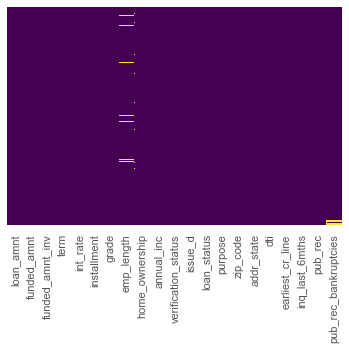

In [15]:
#We can clearly see the number of missing values are now reduced
sns.heatmap(loan.isnull(),yticklabels = False,cbar=False,cmap='viridis')
plt.show()

### 2.2 Fixing Rows

- In this case study, we will use EDA to understand how `consumer attributes` and `loan attributes` influence the tendency of default.
-  So,I will be removing records with loan status as “Current”, as the loan is currently running and we can’t infer any information regarding default from such loans.
- As a result,we need to consider only records for loan status - `'Fully Paid'` and `'Charged-Off'`.

In [16]:
#Checking the break-up of rows according to 'loan status'
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [17]:
#Excluding all the records with 'loan_status == Current' from the dataframe and then checking the updated shape

loan = loan[~(loan['loan_status'] == 'Current')]
loan.shape

(38577, 21)

In [18]:
#Verifying again to ensure no record with 'Current' status exists.

loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [19]:
# Creating a new column loan_status_norm as Fully Paid to 0 and Charged Off to 1.This will normalise the values
#and help in plotting.

loan["loan_status_norm"] = loan["loan_status"].apply(lambda x: 0 if x == "Fully Paid" else 1)

### 2.3 Data Cleaning

In [20]:
# Update emp_length feature with continuous values as int where (< 1 year) is assumed as 0 and 10+ years is assumed 
#as 10 and rest are stored as their magnitude

loan['emp_length'] = loan['emp_length'].str.replace('years','').str.replace('year','').str.strip()
loan['emp_length'] = loan['emp_length'].replace('10+', '10').replace('< 1', '0').astype('float')

In [21]:
# Lets remove % symbol from interest rate column 

loan['int_rate'] = loan['int_rate'].str.replace('%','').astype('float')

In [22]:
# removing whitespaces

loan.term = loan.term.str.strip()

# remove text data from term feature and store as numerical

loan["term"] = pd.to_numeric(loan["term"].apply(lambda x:x.split()[0]))

#### -  Outlier Treatment 

In [23]:
#First,I am checking if the column has any outliers which will impact data analysis and visualising of plots

pd.options.display.float_format = '{:.2f}'.format
applicants_annual_inc = loan.loc[:,['annual_inc']]
print(applicants_annual_inc.describe(percentiles=[0.1,0.25,0.5,0.75,0.90,0.95,0.98,0.99]))

       annual_inc
count    38577.00
mean     68777.97
std      64218.68
min       4000.00
10%      30000.00
25%      40000.00
50%      58868.00
75%      82000.00
90%     115000.00
95%     140004.00
98%     187000.00
99%     234144.00
max    6000000.00


#### We can see above maximum annual income value = **6000000**  and it is approximately **94** times of mean income value = **63793** - which clearly proves there are outliers in the data.

In [24]:
#### So we can remove the outliers values > 99%

applicants_annual_inc['annual_inc'] = applicants_annual_inc[applicants_annual_inc['annual_inc'] < applicants_annual_inc['annual_inc'].quantile(0.99)]
print(applicants_annual_inc.annual_inc.describe())

count    38191.00
mean     65313.61
std      35150.77
min       4000.00
25%      40000.00
50%      58000.00
75%      80232.00
max     234000.00
Name: annual_inc, dtype: float64


#### -  Binning Numerical Data which will help in Analysis

In [25]:
# categorise interest rates into buckets which will help in further analysis.
loan['int_rate_binned'] = pd.cut(loan['int_rate'], bins = [0, 7.5, 10, 12.5, 15, 100],
labels = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+'])

# categorise annual incomes into buckets which will help in further analysis.
# segmenting based on percentile
loan['annual_inc_binned'] = pd.qcut(loan['annual_inc'], q=8, precision=0) 

# categorise loan funded amounts into buckets which will help in further analysis.
# segmenting based on percentile
loan['funded_amnt_binned'] = pd.qcut(loan['funded_amnt'], q=8, precision=0) 

# categorise dti into buckets for further analysis.
loan['dti_binned'] = pd.qcut(loan['dti'], 8)

In [26]:
#Lets check how our data looks after cleaning and standardizing the features
loan.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  emp_length home_ownership  annual_inc verification_status issue_d  loan_status         purpose zip_code addr_state   dti earliest_cr_line  inq_last_6mths  pub_rec  pub_rec_bankruptcies  loan_status_norm int_rate_binned   annual_inc_binned funded_amnt_binned      dti_binned
0       5000         5000          4975.00    36     10.65       162.87     B       10.00           RENT    24000.00            Verified  Dec-11   Fully Paid     credit_card    860xx         AZ 27.65           Jan-85               1        0                  0.00                 0         10-12.5   (3999.0, 31200.0]   (3600.0, 5200.0]   (21.6, 29.99]
1       2500         2500          2500.00    60     15.27        59.83     C        0.00           RENT    30000.00     Source Verified  Dec-11  Charged Off             car    309xx         GA  1.00           Apr-99               5        0                  0.00                 1             15+   (3999.0, 31200.0]    (499.0, 3600.0]  (-0.001, 4.81]
2       2400         2400          2400.00    36     15.96        84.33     C       10.00           RENT    12252.00        Not Verified  Dec-11   Fully Paid  small_business    606xx         IL  8.72           Nov-01               2        0                  0.00                 0             15+   (3999.0, 31200.0]    (499.0, 3600.0]   (8.13, 10.82]
3      10000        10000         10000.00    36     13.49       339.31     C       10.00           RENT    49200.00     Source Verified  Dec-11   Fully Paid           other    917xx         CA 20.00           Feb-96               1        0                  0.00                 0         12.5-15  (40000.0, 50000.0]  (9550.0, 12000.0]   (18.56, 21.6]
5       5000         5000          5000.00    36      7.90       156.46     A        3.00           RENT    36000.00     Source Verified  Dec-11   Fully Paid         wedding    852xx         AZ 11.20           Nov-04               3        0                  0.00                 0          7.5-10  (31200.0, 40000.0]   (3600.0, 5200.0]  (10.82, 13.37]

## Step 3: Univariate Analysis

#### -  The quantification of credit risk is the process of assigning measurable and comparable numbers to the likelihood of default risk and the concept is a major frontier in modern finance.(refer to https://www.investopedia.com/articles/personal-finance/072514/what-lenders-look-your-credit-report.asp).
#### -  Post data cleansing activities,the below features are selected - which I think will provide valuable insight into possible causes/indicators of loan defaults.

In [ ]:
# One of the key evaluation parameters for this task is to use Functions for repetative tasks.
# So,I am writing two functions to plot graphs for continous and categorical variables.

In [27]:
#Function to plot the graphs for continuous variables based on the arguments provided

def univariate_continuous_plots(df,var,title):
    
    #Distribution Plots
    sns.set(context='paper')
    plt.figure(figsize=[9.0,6.0],dpi=100,edgecolor='w',frameon=True)
    plt.subplot(221)
    title_1 = title + ' - Distribution Plot '
    plt.title(title_1,pad=7)
    plot = sns.distplot(df[var].dropna(),norm_hist=False)

    #Box Plots
    plt.subplot(222)
    title_2 = title + ' - Box Plot'
    plt.title(title_2,pad=7)
    plot = sns.boxplot(data=df,x=var,orient='v')
    plt.tight_layout()


#Function to plot the graphs for categorical variables based on the arguments provided

def univariate_categorical_plots(df,var,title,orient ='v',size ='medium',val_cnt_limit =0):

    df=df.loc[:,[var]]
    df= pd.DataFrame(df[var].value_counts().rename('count').reset_index())
    df.columns = [var,'count']
    if val_cnt_limit >= 0:
        df = df.loc[df['count'] >= val_cnt_limit]
    
    #Plot parameters
    if size == 'large':
        plt.figure(figsize=[10.0,10.0],dpi=100,frameon=True)
    else:
        plt.figure(figsize=[4.0,4.0],dpi=100,frameon=True)
     
    #Distribution Plots
    if orient == 'v':
        plot = sns.barplot(x=var, y='count', data=df,orient=orient)
        plt.ylabel("Count")
        plt.xlabel(var)
        plt.title(title)
    else:
        plot = sns.barplot(x='count', y=var, data=df,orient=orient)
        plt.xlabel("Count")
        plt.ylabel(var)
        plt.title(title)
    plt.show()

  ###  <font color=green> 3.1 **"funded_amnt"** (Quantitative Variable)- The total amount committed to that loan at that point in time.

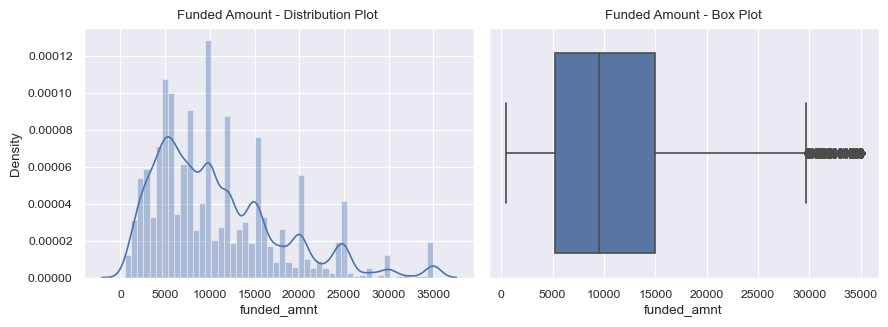

In [28]:
# Univariate Analysis Plot on Funded amount-Quantitative Variable

univariate_continuous_plots(loan,'funded_amnt','Funded Amount')

In [29]:
#Few statistical data for further inference

print(loan.funded_amnt.describe(percentiles=[0.1,0.25,0.5,0.75,0.90,0.95,0.98,0.99]))

count   38577.00
mean    10784.06
std      7090.31
min       500.00
10%      3000.00
25%      5200.00
50%      9550.00
75%     15000.00
90%     20000.00
95%     25000.00
98%     30000.00
99%     35000.00
max     35000.00
Name: funded_amnt, dtype: float64


### Observations :
#### 1. From Distribution plot we can infer in most cases,Lending Club approves loan between 500 USD and 35,000 USD.<br> 2. As evident from the plot above,majortiy of applicants received funded loans between 5000 to 20000 USD.

   ### <font color=green> 3.2 **"annual_inc"** (Quantitative Variable)- The self-reported annual income provided by the borrower during registration.

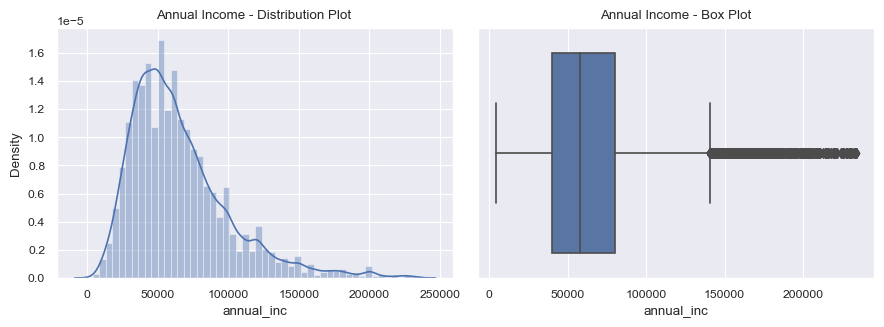

In [30]:
# Univariate Analysis Plot on Annual Income of applicants-Quantitative Variables

univariate_continuous_plots(applicants_annual_inc,'annual_inc','Annual Income')

### Observations :
#### 1. Annual Income for majority of applicants are between **20000 to 150000 USD**.<br> 2. Maximum count of applicants are at **60000** and 50000 USD</font>

   ### <font color=green> 3.3 **"int_rate"** (Quantitative Variable)- Interest Rate on the loan.

In [31]:
#First lets see the descriptive statistics of the data

print(loan.int_rate.describe(percentiles=[0.1,0.25,0.5,0.75,0.90,0.95,0.98,0.99]))

count   38577.00
mean       11.93
std         3.69
min         5.42
10%         7.14
25%         8.94
50%        11.71
75%        14.38
90%        16.82
95%        18.31
98%        19.91
99%        20.99
max        24.40
Name: int_rate, dtype: float64


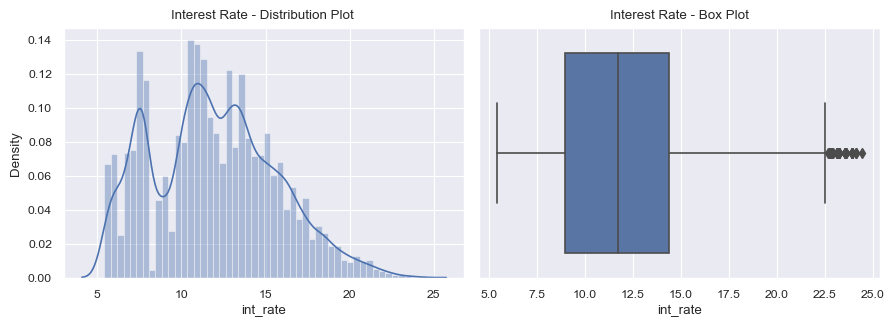

In [32]:
# Univariate Analysis Plot on Interest Rate of Loans-Quantitative Variable

univariate_continuous_plots(loan,'int_rate','Interest Rate')

### Observations :
#### 1. From the distribution plot we can infer interest rates for loans varies between **5% to 22.5%**.<br> 2. However,majority of the loans were sanctioned with interest rate hovering around **5%** and **15%**.

   ### <font color=green> 3.4 **"dti"** (Quantitative Variable)- A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [33]:
#First lets see the descriptive statistics of the data

print(loan.dti.describe(percentiles=[0.1,0.25,0.5,0.75,0.90,0.95,0.98,0.99]))

count   38577.00
mean       13.27
std         6.67
min         0.00
10%         4.06
25%         8.13
50%        13.37
75%        18.56
90%        22.29
95%        23.80
98%        24.85
99%        26.53
max        29.99
Name: dti, dtype: float64


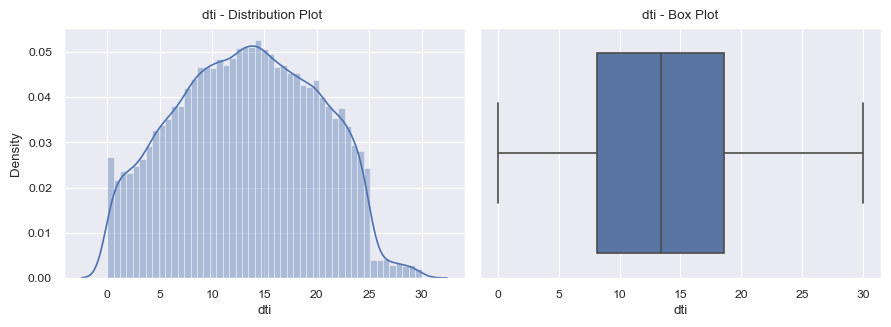

In [34]:
# Univariate Analysis Plot on dti of applicants-Quantitative Variables

univariate_continuous_plots(loan,'dti','dti')

### Observations :
#### 1. As evident from above,majority of applicants with approved loan has dti between **0 to 25**.<br> 2. If we observe carefully,between **25** and **30** the loan approval drops significantly and beyond 30 there are no applicants with approved loans.

   ### <font color=green> 3.5 **"loan_status"** (Unordered Categorical Variable)- Current status of the loan.

In [35]:
#First,I will check the counts of unique values for each loan_status category and assign it to a new variable to be used
#plotting 

loan_status_cat = loan.loan_status.value_counts()
loan_status_cat.head()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

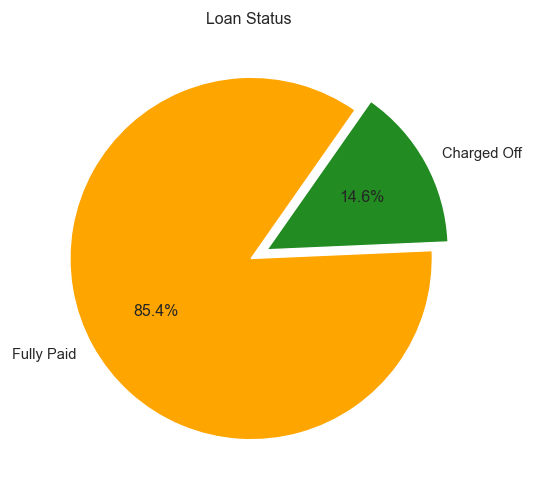

In [36]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status

loan_status_cat_perc = [loan_status_cat['Fully Paid'], loan_status_cat['Charged Off'] ]
plt.figure(figsize=[5.0,5.0],dpi=120,edgecolor='c',frameon=True)
plt.title('Loan Status ',pad=5)
# Data to plot
labels = ['Fully Paid','Charged Off']
colors = ['orange', 'forestgreen']
explode = (0, 0.1) 
# Plot
plt.pie(loan_status_cat_perc,explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', startangle=55)
plt.show()

## Observations :
#### 1. As evident from above the percentage of bad loans at present is around **14.6%**.<br>

  ### <font color=green> 3.6 **"purpose"** (Unordered Categorical Variable)- A category provided by the borrower for the loan request.

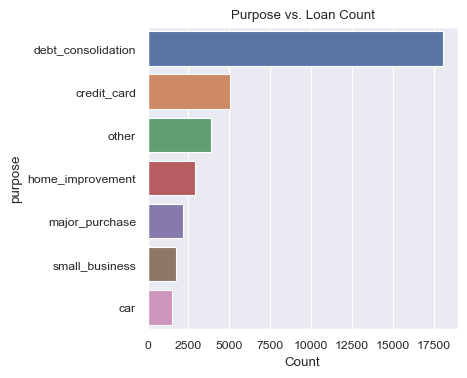

In [37]:
# Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan
univariate_categorical_plots(loan,'purpose','Purpose vs. Loan Count','h',val_cnt_limit=1000)

### Observations :
#### 1. Above plots show that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.

  ### <font color=green> 3.7 **"home_ownership"** (Unordered Categorical Variable)- The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

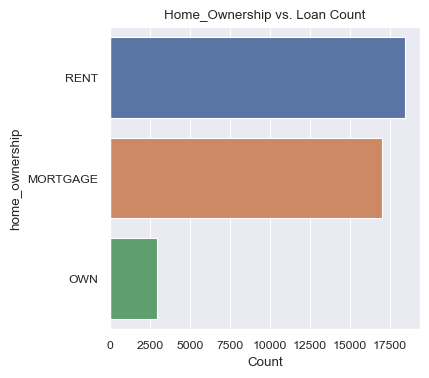

In [38]:
# Univariate Analysis - Unordered Categorical Variables - Home Ownership
univariate_categorical_plots(loan,'home_ownership','Home_Ownership vs. Loan Count','h',val_cnt_limit=1000)

### Observations :
#### 1. Above plot shows that most of the applicants are either **Renting** or has their houses on **Mortgages**.<br>

  ### <font color=green> 3.8 **"addr_state"** (Unordered Categorical Variable)- The state provided by the borrower in the loan application.

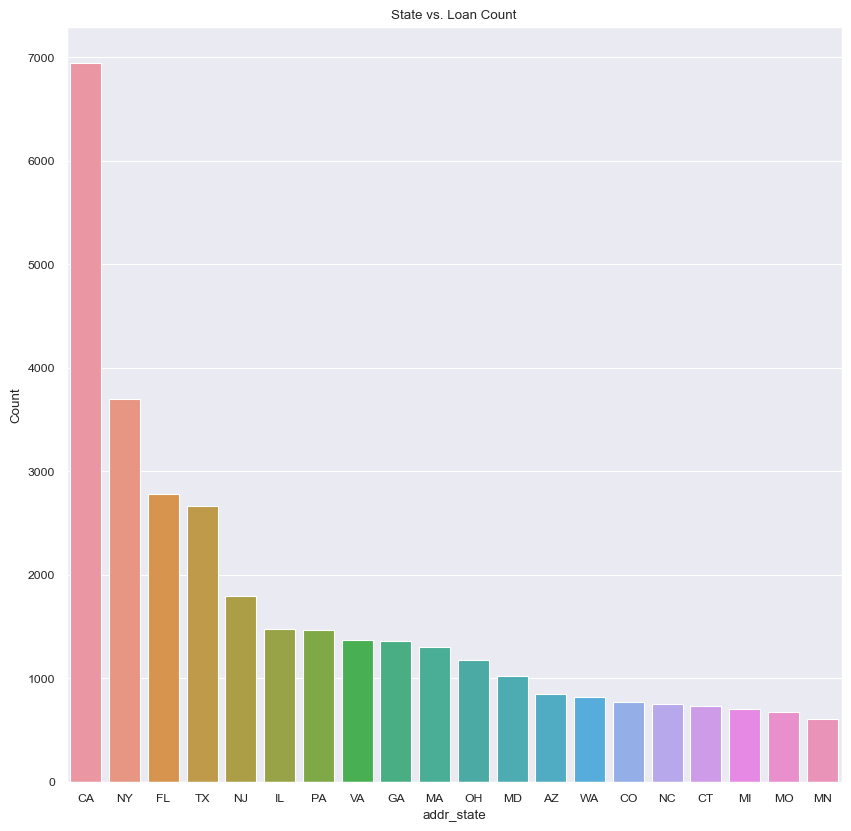

In [39]:
# Univariate Analysis - Unordered Categorical Variables - States with most applicants

univariate_categorical_plots(loan,'addr_state','State vs. Loan Count',size = 'large', val_cnt_limit=500)

### Observations :
#### 1. **California,New York,Florida,Texas,New Jersey** leads the way with most number of applicants.Incidentally they are also among the most populous states in USA which makes sense.<br>

  ### <font color=green> 3.9 **"inq_last_6mths"** (Quantitative Variable)- The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

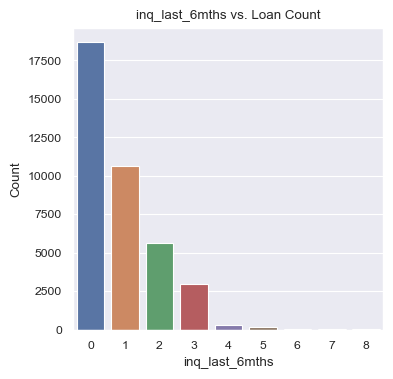

In [40]:
# Univariate Analysis - Numerical Variables - Number of Loan enquiries in last 6 months

univariate_categorical_plots(loan,'inq_last_6mths','inq_last_6mths vs. Loan Count')

### Observations :
#### 1. Most of the applicants has prior inquiry records between 1 and 3.<br>

  ### <font color=green> 3.10 **"grade"** (Categorical Variable)- LC assigned loan grade

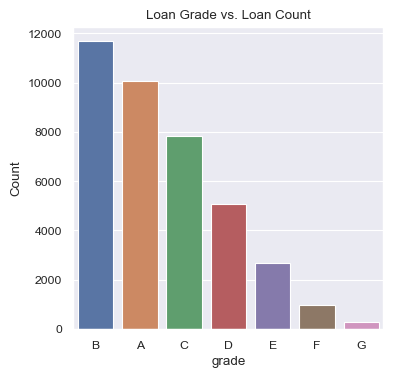

In [41]:
univariate_categorical_plots(loan,'grade','Loan Grade vs. Loan Count','v')

### Observations :
#### 1. Cross-checking Lending Club's site - https://www.lendingclub.com/foliofn/rateDetail.action, it seems the interest rate across the 4 categories - B,A,C and D ranges from 8.46% till 30.99% - which is also among the Top 4 categories of approved Loan.

###  <font color=green> From the univariate analysis we can conclude following `6` columns may provide reasonable insight into loan default behavioural process- 

  -  **funded_amnt** - The total amount committed to that loan at that point in time.
  -  **int_rate** - Interest Rate on the loan
  -  **annual_inc** - The self-reported annual income provided by the borrower during registration.
  -  **purpose** - A category provided by the borrower for the loan request. 
  -  **dti** - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.<br>
  -  **grade** - LC assigned loan grade.<br>

## Step 4: Derived Metrics

#### **"inq_last_6mths"**  - **Type Driven Metric** <br>
  - It is clear from the above plot, new loan enquiries either at branch/online was far to few and is conveniently grouped at less than 3.So,we can box the value in a new column for further analysis.

In [42]:
loan["inq_last_6mths_box"] = loan["inq_last_6mths"].apply(lambda x:3 if(x>3) else x)
loan["inq_last_6mths_box"].value_counts()

0    18709
1    10660
2     5654
3     3554
Name: inq_last_6mths_box, dtype: int64

#### **"dti_updated"**  - **Business Driven Metric** <br>
  - Debt-to-income (DTI) is a lending term that describes a person’s monthly debt load as compared to their monthly gross income. Lending club can use debt-to-income to determine whether a loan applicant will be able to make payments on a given loan. In other words, DTI measures the economic burden a loan would have on an applicant.

In [43]:
#First lets calculate the monthly income of individual applicants and store in a new variable
loan['monthly_inc'] = loan['annual_inc'] / 12 

#Second,I am calculating the updated DTI ratio of installment amount to monthly income and storing in a new variable
loan['dti_updated'] = (loan['installment']  / loan['monthly_inc']) + (loan.dti/100)  

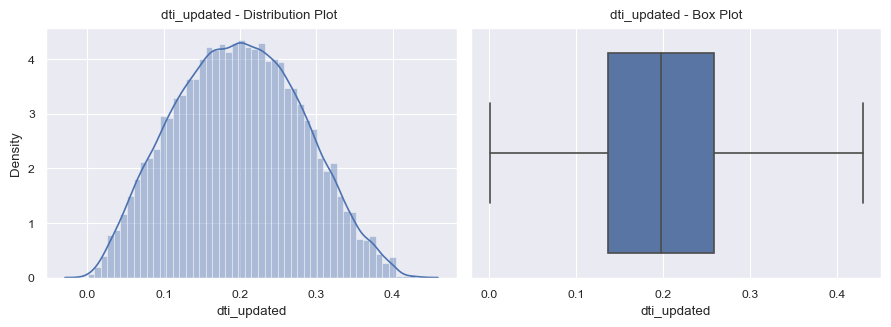

In [44]:
#Plotting to see the spread of the new column 'dti_updated'
univariate_continuous_plots(loan, 'dti_updated', 'dti_updated')

In [45]:
#categorise dti_updated into buckets for bivariate analysis.
loan['dti_updated_binned'] = pd.qcut(loan['dti_updated'], 8) 

#### **Data Driven Metrics** 

In [46]:
# Lets create month and year columns separately 
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan['issue_d'].dt.year
loan['month']=loan['issue_d'].dt.month

loan.head(1)

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  emp_length home_ownership  annual_inc verification_status    issue_d loan_status      purpose zip_code addr_state   dti earliest_cr_line  inq_last_6mths  pub_rec  pub_rec_bankruptcies  loan_status_norm int_rate_binned  annual_inc_binned funded_amnt_binned     dti_binned  inq_last_6mths_box  monthly_inc  dti_updated  \
0       5000         5000          4975.00    36     10.65       162.87     B       10.00           RENT    24000.00            Verified 2011-12-01  Fully Paid  credit_card    860xx         AZ 27.65           Jan-85               1        0                  0.00                 0         10-12.5  (3999.0, 31200.0]   (3600.0, 5200.0]  (21.6, 29.99]                   1      2000.00         0.36   

  dti_updated_binned  year  month  
0      (0.297, 0.43]  2011     12

## Step 5: Segmented Univariate Analysis

-  We segment the categorical variables and then conduct univariate analysis across its categories.In other words,we will analyse each individual variables and it's effect on the 'Loan Default' behaviours.

In [47]:
#First we will segment the complete set of records into 2 categories - 'Fully Paid' and 'Charged_Off'

fully_paid_records= loan[loan.loan_status == 'Fully Paid']
charged_off_records = loan[loan.loan_status == 'Charged Off'] 

-  Loan Default ratio is calculated for each categorical influencing variable by considering the **'Charged Off' / ('Charged Off' + 'Fully Paid')**

In [52]:
#Similar to above,I am writing one function to plot graphs for segmented univariate analysis.

In [48]:
def segmented_univariate_plots(var, title, orient='v', size='large', fillna=False):
    
    # generting a data frame with defualt ratio as a coloumn
    
    if(fillna == True):
        var_dist = (charged_off_records[var].value_counts() / loan[var].value_counts()).to_frame(name='default_ratio').rename_axis(var).reset_index().fillna(0)
    else:
        var_dist = (charged_off_records[var].value_counts() / loan[var].value_counts()).to_frame(name='default_ratio').rename_axis(var).reset_index()
    if((size=='large') & (orient == 'v') ):
        fig = plt.figure(figsize=(14, 7))
    elif((size=='medium') & (orient == 'v') ):
        fig = plt.figure(figsize=(10, 5))
    elif(orient == 'v') :
        fig = plt.figure(figsize=(8, 4))        
    
    if orient == 'v':
        plot = sns.barplot(x=var, y='default_ratio', data=var_dist)
        plt.ylabel("Loan default ratio")
        plt.xlabel(var)
        for index, row in var_dist.iterrows():
            plot.text( row.name ,row.default_ratio, round(row.default_ratio,2), color='black', ha="center")
    else:
        fig = plt.figure(figsize=(8, 10))   
        plot = sns.barplot(x='default_ratio', y=var, data=var_dist)
        plt.xlabel("Loan default ratio")
        plt.ylabel(var)
        for index, row in var_dist.iterrows():
            plot.text( row.default_ratio, row.name , round(row.default_ratio,2), color='black', ha="center")        
    plot.set_title(title + " Vs Loan defualt ratio")

    plt.show()

### 5.1 Funded loan amount

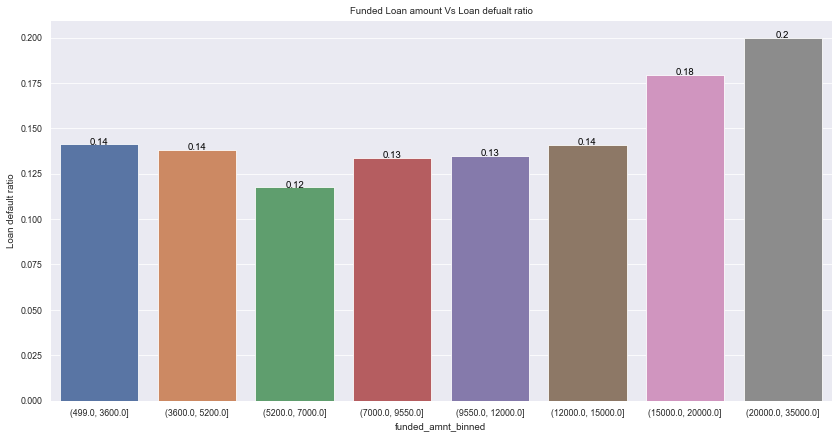

In [49]:
# Funded loan amount and it's impact on loan default ratio.

segmented_univariate_plots('funded_amnt_binned', "Funded Loan amount", size='large')

### Observations :
####  1. With increase in funded loan amount the default rate also rises.There are clear evidence of loan availed amount influencing the default ratio - customers who have borrowed more than they can afford tends to default more.

### 5.2 Terms

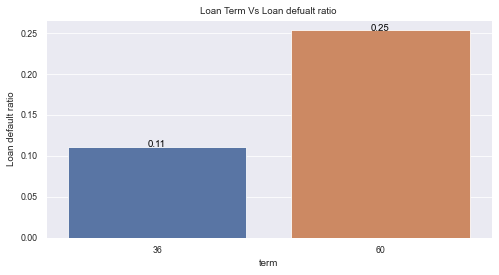

In [50]:
# Terms of Loan and it's influence on loan default ratio

segmented_univariate_plots('term', "Loan Term", size='small')

### Observations :
#### 1. From above plot for ‘term’ we can infer that the defaulters rate is increasing wrt term, hence the chances of loan getting deaulted is less for 36m than 60m.

### 5.3 Purpose

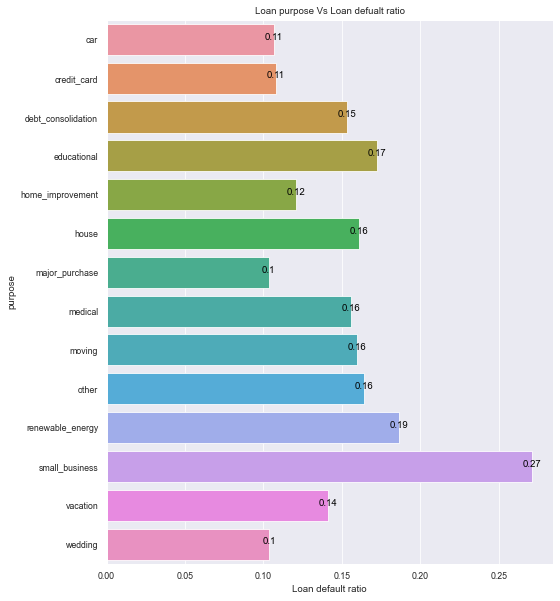

In [51]:
# Purpose for which loan was availed and it's impact on default ratio

segmented_univariate_plots('purpose', "Loan purpose" ,orient='h')

### Observations :
#### 1. We can infer that the defaulters rate is nearly constant for all purpose type except ‘small business’ in other words applicants who have taken loans for small business is more likely to default.

### 5.4 Loan Grade

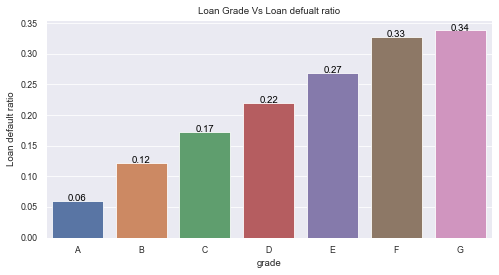

In [52]:
# Univariate Analysis - Ordered Categorical Variables - Loan Grade
segmented_univariate_plots('grade', "Loan Grade", size='small')

### Observations :
#### 1. From above plot for ‘grade’ we can infer that the defaulters rate is increasing wrt grade, hence the chances of loan getting deaulted increases with the grade from A moving towards G.<br> 2. Cross-checking Lending Club's site - https://www.lendingclub.com/foliofn/rateDetail.action, it seems the interest rate across these 4 categories ranges from 8.46% till 30.99%

### 5.5 Interest Rate

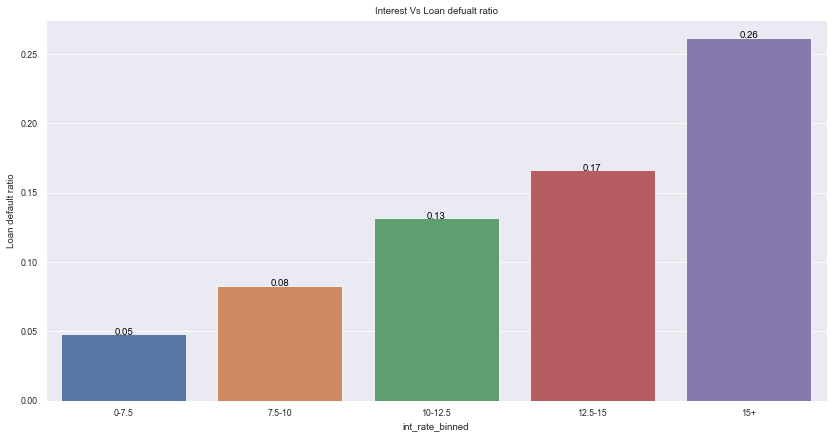

In [53]:
# Interest Rate Analysis

segmented_univariate_plots('int_rate_binned', "Interest")

### Observations :
#### 1. The plot shows that the default rate increases with the increase in the interest rate.Higher interest rates has obvious impact on loan default ratio.

### 5.6 Annual Income

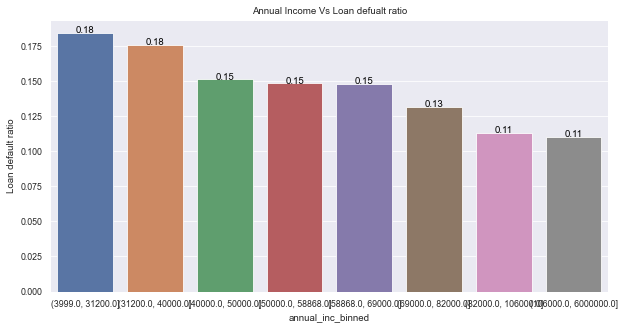

In [54]:
# Annual Income of applicants and it's impact on loan default ration

segmented_univariate_plots('annual_inc_binned', "Annual Income", size='medium')

### Observations :
#### 1. From above plot for ‘annual_inc’ we can infer that the defaulters rate is decreasing as with annual_inc values.

### 5.7 dti

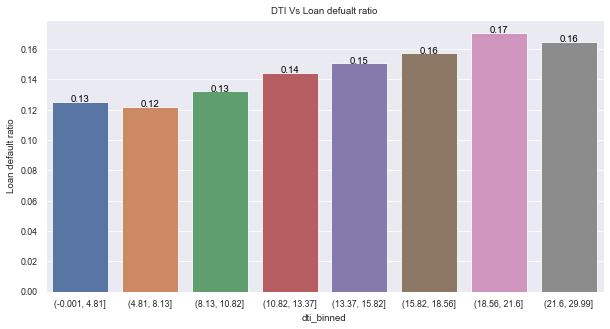

In [55]:
# Debt to Income ratio and it's impact on loan default ratio

segmented_univariate_plots('dti_binned', "DTI", size='medium')

## Observations :
#### 1. From above plot for ‘dti_range’ we can infer that the defaulters rate is increasing as with dti_range values.

### 5.8 pub_rec_bankruptcies

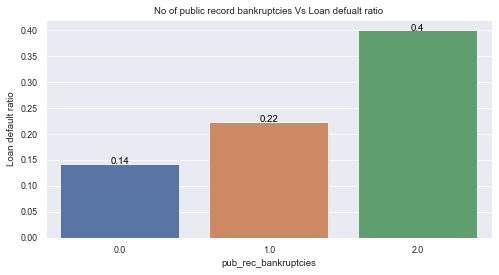

In [56]:
# Public Bankruptcy records and it's impact on loan default ration

segmented_univariate_plots('pub_rec_bankruptcies', "No of public record bankruptcies", size='small')

### Observations :
#### 1. Applicants with more bankruptcy records are ideal default candidates.

### 5.9 pub_rec

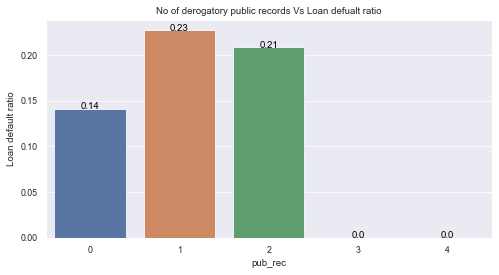

In [57]:
# Influence of number of derogatory public records on loan default

segmented_univariate_plots('pub_rec', "No of derogatory public records", size='small', fillna=True)

### Observations :
#### 1. Applicants with derogatory records are ideal default candidates.

### 5.10 addr_state

-  First I will subset the location data into 2 separate dataframes for **'fully paid'** and **'charged off'** loans.This will help me in plotting the data.

In [58]:
loanfullypaid_loc_df = pd.DataFrame({'state':fully_paid_records.addr_state.value_counts().index, 'fullypaid':fully_paid_records.addr_state.value_counts().values})
loanchargedoff_loc_df = pd.DataFrame({'state':charged_off_records.addr_state.value_counts().index, 'chargedoff':charged_off_records.addr_state.value_counts().values})

loanstate_df = pd.merge(loanfullypaid_loc_df, loanchargedoff_loc_df,how='outer', on='state')
# Lets keep only states with more than 10 loan accounts
loanstate_df = loanstate_df[loanstate_df.chargedoff > 10]
# loanstate_df
loanstate_df['default_ratio'] = loanstate_df.chargedoff/loanstate_df.fullypaid

-  Next I am going to use a Choropleth Map which is a map composed of colored polygons to display the statewise distribution of loan applicants. It is used to represent spatial variations of a quantity.

In [59]:
plot_map = px.choropleth(locations=list(loanstate_df.state), locationmode="USA-states", color=loanstate_df.default_ratio,scope="usa")
plot_map.show()

## Observations :
#### 1. Applicants residing in Nevada,South Dakota,Florida,Missouri has more default ratio records .

### 5.11 Home Ownership

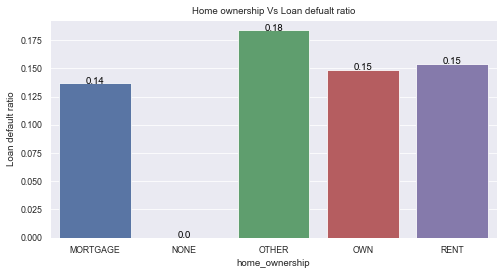

In [60]:
#Impact of home ownership on loan default ratio

segmented_univariate_plots('home_ownership', "Home ownership", size='small', fillna=True)

### Observations :
#### 1. From above plot for ‘home_ownership’ we can infer that the defaulters rate is constant here (it is quite more for OTHERS but we dont know what is in there, so we’ll not consider it for analysis), hence defaulter does not depends on home_ownership.

### 5.12 Employement Length 

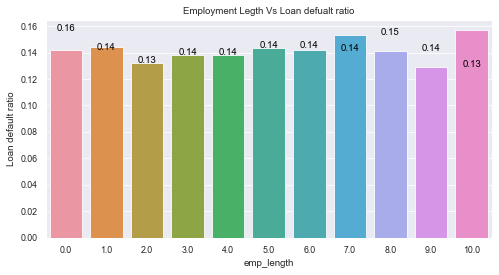

In [61]:
#Impact of total years of employment of applicants on the default ratio

segmented_univariate_plots('emp_length', "Employment Legth", size='small')

### Observations :
#### 1. From above plot for ‘emp_length’ we can infer that the defaulters rate is constant here, hence defaulter does not depends on emp_length.

### 5.13 No of Inquiries in 6 months (inq_last_6mths) 

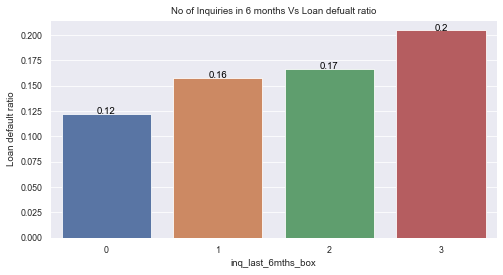

In [62]:
#Does making enquiries about loan has impact on default ratio

segmented_univariate_plots('inq_last_6mths_box', "No of Inquiries in 6 months", size='small')

### Observations :
#### 1. From above plot for ‘inq_last_6mths’ we can infer that when the number of loan enquiry about a customer is higher, there is a tendency towards higher default rate.

### 5.14 dti_updated

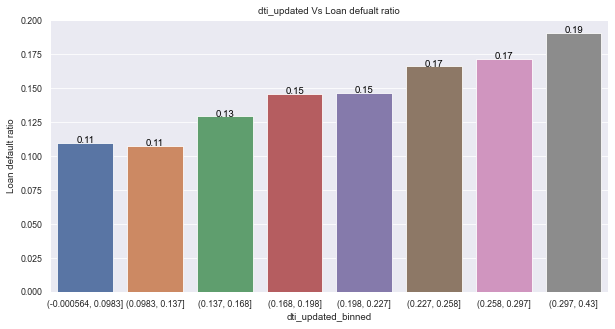

In [63]:
# Calculated Debt-to-income ratio and it's impact on loan default

segmented_univariate_plots('dti_updated_binned', "dti_updated", size='medium')

### Observations :
#### 1. From above plot it is evident applicant,customer with Debt to Income ratio of more that 30% has chance of defaulting.So,LC should avoid approving loan for these customers.

### 5.15 Verification Status Analysis

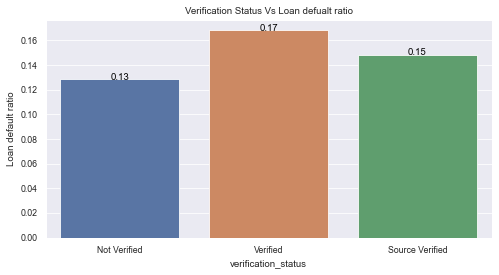

In [64]:
# Usually Lending Club verifies the earnings of the applicants - does it have any potential impact on default ratio?

segmented_univariate_plots('verification_status', "Verification Status", size='small')

### Observations :
#### 1. From above plot ,it looks like veifying the annual income of the applicant won't make any difference on loan approval,we can't infer any significant difference and thus impact on default ratio.

## Step 6: Bivariate Analysis

#### 1. As seen in the above steps,I was writing the same code repeatedly for plotting the data.To avoid this I am writing a function below which can be used for data plotting for Bivariate analysis.

In [65]:
#Function to plot Bar plots for Bivariate analysis based on the arguments provided

def plotBivariateBar(df,var1, var2 , xlabel, title, figsize):   

    ##Sub setting 'Charged off' loan status count for the columns 'var1' and 'var2'
    loan_default = df.loc[loan.loan_status == 'Charged Off'].groupby(by=[var1,var2])['loan_status'].count().rename('Default_count').sort_values(ascending=False).reset_index()

    ##Sub setting Total loan status count for the columns 'var1' and 'var2'
    loan_total = df.groupby(by=[var1,var2])['loan_status'].count().rename('Total_count').sort_values(ascending=False).reset_index()

    ##Merging the two dataframes so that we can calculate % for charged off/default ratio - this is essential for bivariate plots
    loan_merged = pd.merge(loan_total,loan_default,how='inner',on=[var1,var2])
    loan_merged['default_percentage'] = round(loan_merged['Default_count']/loan_merged['Total_count']*100,2)


    plt.figure(figsize=figsize,dpi=120,frameon=True)
    sns.barplot(x=var1, y='default_percentage', hue=var2,data=loan_merged)
    plt.ylabel("Loan Status = Default Percentage")
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

### 6.1 Bivariate analysis of categorical variables `term` & `grade` with respect to `Charged Off -loan_status` 

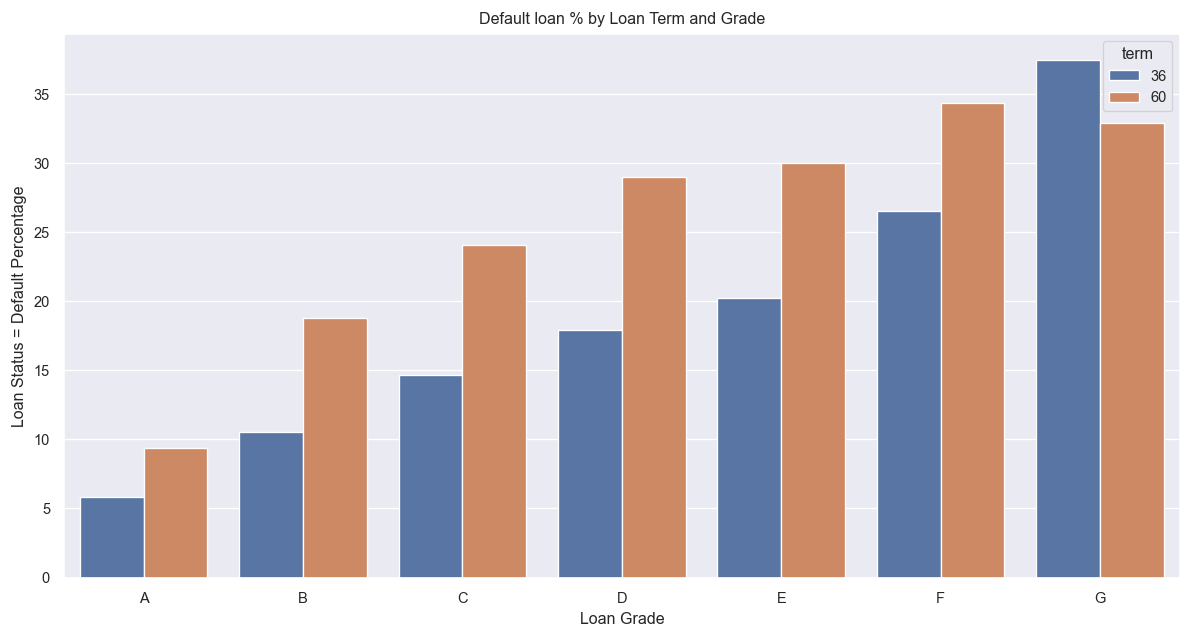

In [66]:
plotBivariateBar(loan,'grade','term', "Loan Grade", "Default loan % by Loan Term and Grade" , [12.0,6.0] )

### Observations :
#### 1. From above plot ,it is clear that Grade A & B are less risky i.e chances of defaults are comparatively lower than other grades

### 6.2 Bivariate analysis of categorical variables `Number of bankruptcies records`  & `Number of derogatory public records` with respect to `Charged Off -loan_status` 

In [67]:
#Since we know that the number of bankruptcy records greater than 2 is very low,we can group those records 
#with categoy 1 and update the current column.
loan["pub_rec_bankruptcies"] = loan["pub_rec_bankruptcies"].apply(lambda x:'1/More bankruptcies' if(x>=1) else 'No bankruptcies')

#Checking the count of the new values
loan["pub_rec_bankruptcies"].value_counts()

No bankruptcies        36935
1/More bankruptcies     1642
Name: pub_rec_bankruptcies, dtype: int64

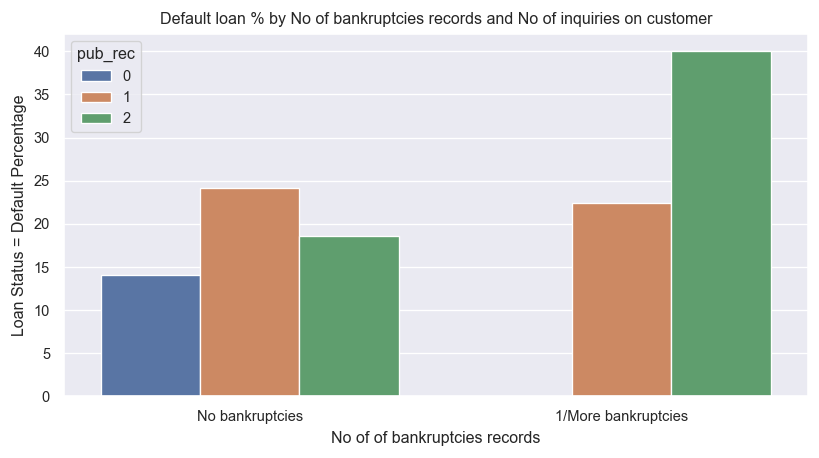

In [68]:
plotBivariateBar(loan, 'pub_rec_bankruptcies','pub_rec', "No of of bankruptcies records", 
                      "Default loan % by No of bankruptcies records and No of inquiries on customer", [8.0,4.0])

### Observations :
#### 1. From above plot ,it is clear that applicants with higher bankruptcy and public derogatory records are more likely to default.

### 6.3 Bivariate analysis of categorical variables `states`  & `purpose` with respect to `Charged Off -loan_status

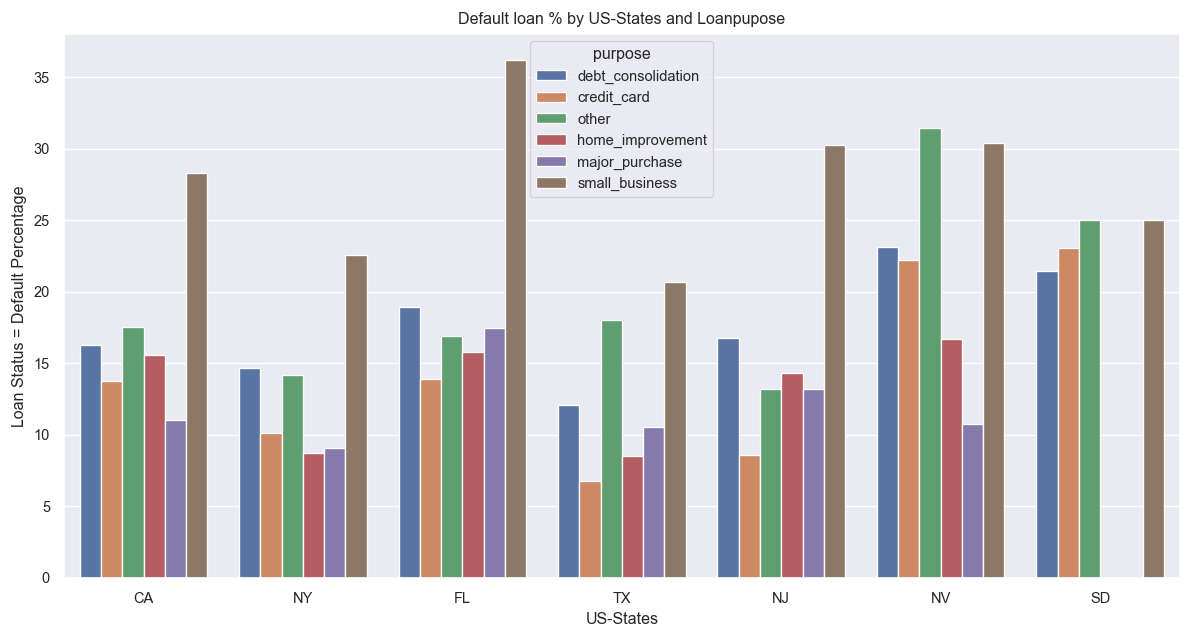

In [69]:
#First lets create a subset of state data because we dont want to plot all the states and make the graph cumbersome.
#We selected the Top states with defaulters as identified in segmented univariate section and created a new dataframe
#'df_state'

df_state = loan[loan["addr_state"].isin(["CA", "NY", "FL", "TX", "NJ", "NV", "SD"]) ]
df_state = df_state[df_state["purpose"].isin(["debt_consolidation", "credit_card", "other",
                                              "home_improvement", "major_purchase", "small_business"]) ]
plotBivariateBar(df_state, 'addr_state','purpose', "US-States", 
                      "Default loan % by US-States and Loanpupose", [12.0,6.0])

### Observations :
#### 1. Across all the top states applicants who have loaned the money for small busines are most likely to default.<br>2. Nevada is an exception where **Others** category is actually higher - but we dont know what this refers to.

### 6.4 Bivariate analysis of categorical variables `annual_income`  & `purpose` with respect to `Charged Off -loan_status

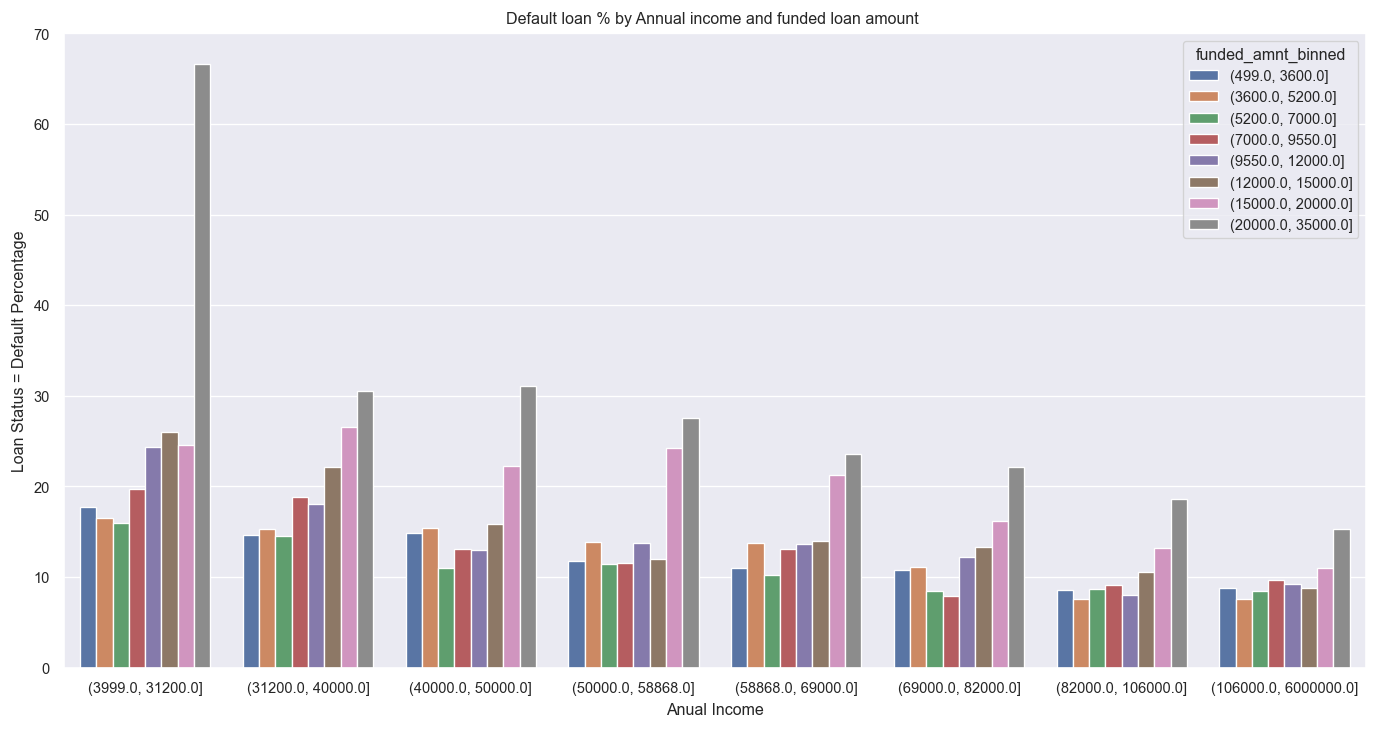

In [70]:
plotBivariateBar(loan, 'annual_inc_binned','funded_amnt_binned', "Anual Income", 
                      "Default loan % by Annual income and funded loan amount ", [14.0,7.0])

### Observations :
#### 1. Funded loan amount of greated than 20000 USD are most likely to default across all income ranges.<br>2. Applicants with less than 70000 USD/year income are more likely to default on loan amount >=15000 USD

### 6.5 Bivariate analysis of categorical variables `grade`  & `number of inquires` with respect to `Charged Off -loan_status

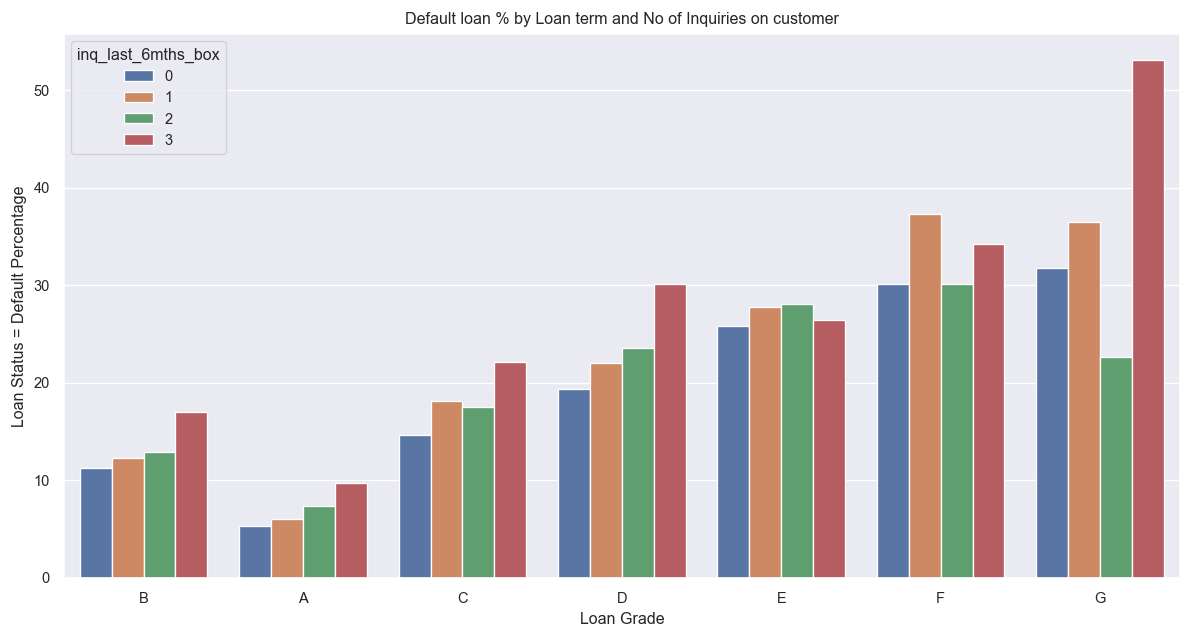

In [71]:
plotBivariateBar(loan, 'grade','inq_last_6mths_box', "Loan Grade", 
                      "Default loan % by Loan term and No of Inquiries on customer" , [12.0,6.0] )

### Observations :
#### 1. G grade loans which has been enquired about most in last 6 months is most likely to default.